In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('stud.csv')

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.shape

(1000, 8)

In [14]:
# No null records
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
# No duplicate records
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [16]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [17]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [18]:
df['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Segregate Numerical and Categorical Feature

In [21]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [22]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [23]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [24]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [25]:
df['avg_score']=df['total_score']/3

In [26]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [27]:
df.describe()

,math_score,reading_score,writing_score,total_score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [28]:
# Explore more Visualization

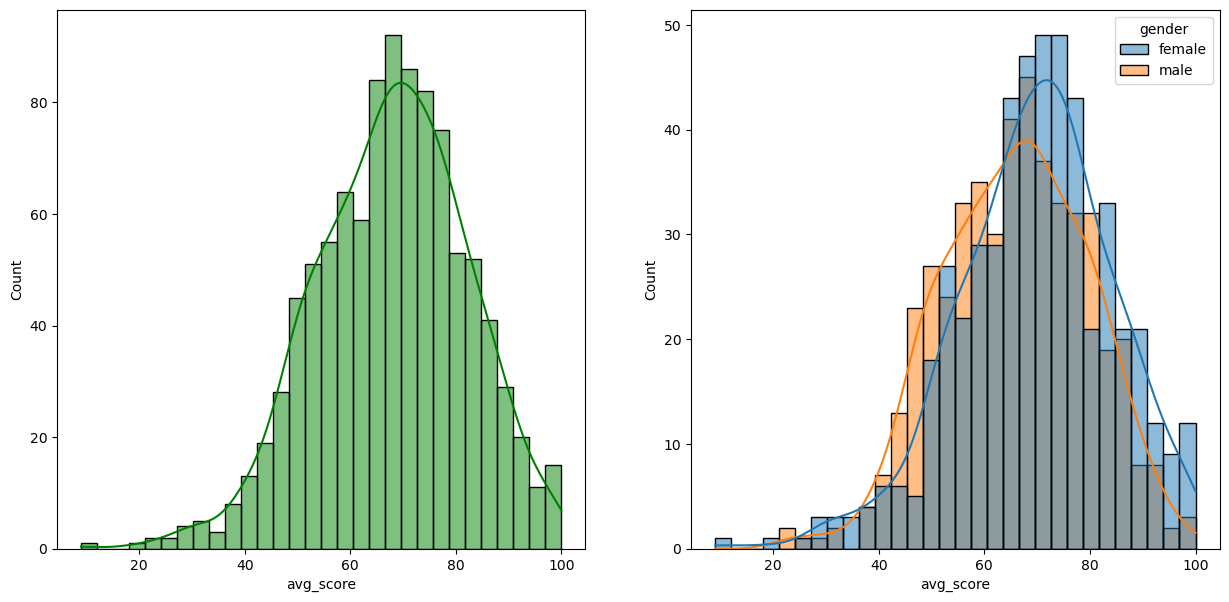

In [30]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='gender')
plt.show()

## insights
 - Female Student tend to perform well than male students

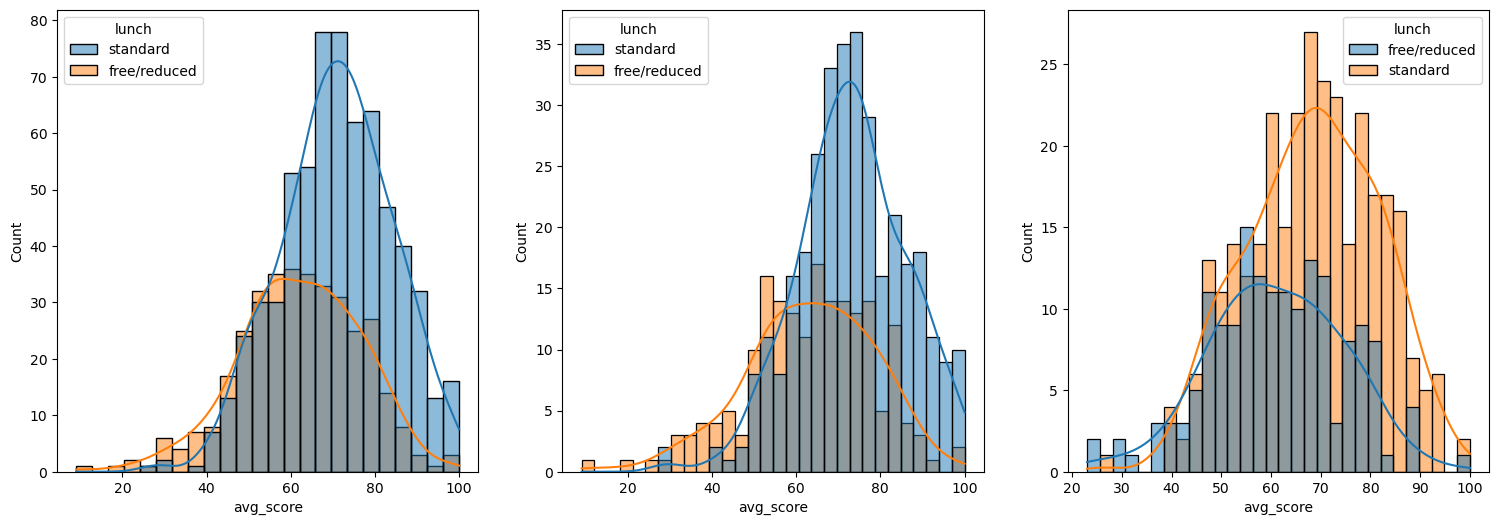

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='lunch')
plt.show()

## insights
- std lunch  help students to perform  well  in exams
- std lunch helps perform well in exams for both female and male

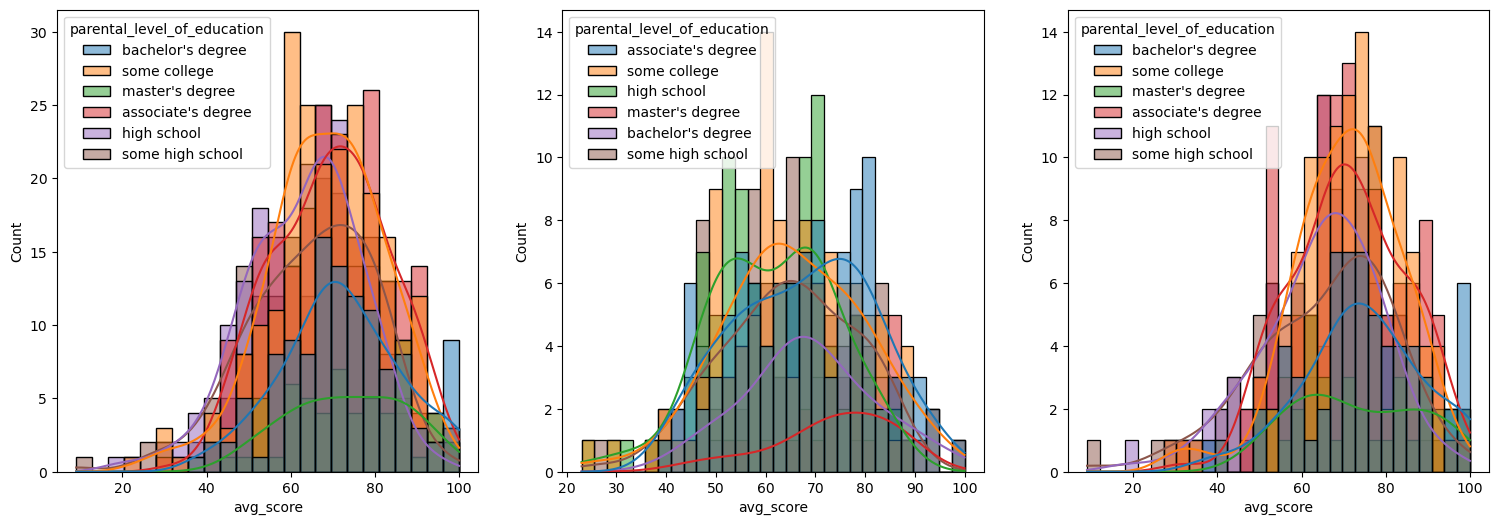

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='parental_level_of_education')
plt.show()

## insights
- In general PArental level of education  dont  help student perform well in exam
- 2nd plot shows that parents  whos education level is of associate or masters degree, their male child  tend to perform well in exam
- 3rd plot we can see  there is no effect of parents education on females education

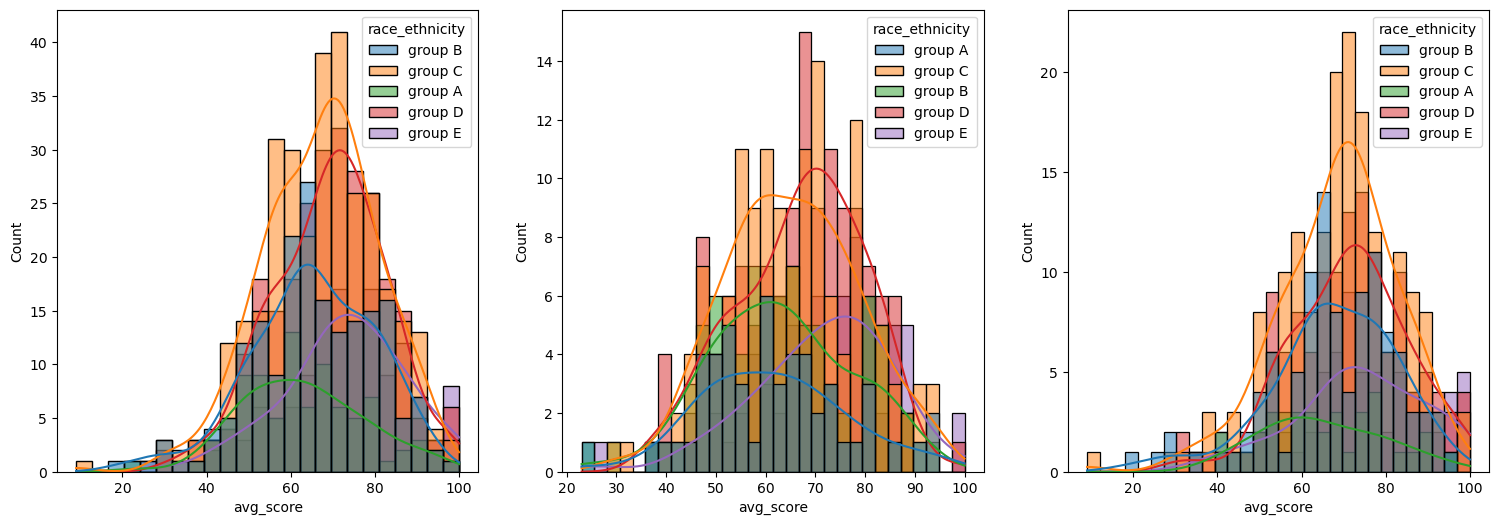

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avg_score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='avg_score',bins=30,kde=True,hue='race_ethnicity')
plt.show()

# Insights
- Students belonging to race ethnicity of group A and group B tend to perform poorly in the exams
- Students belonging to race ethnicity of group A and group B both male and female tend to perform poorly in the exams